<a href="https://colab.research.google.com/github/Hussy24/Predict-Price-for-Gifts/blob/main/hasnain_sajid(27199).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Read the CSV file
df = pd.read_csv('dataset.csv')
df.head


<bound method NDFrame.head of         gift_id  gift_type  gift_category  gift_cluster  \
0      GF_11156         61            534          3942   
1      GF_11157         61            534          3942   
2      GF_15689        584            262             0   
3      GF_11155         61            534          3942   
4      GF_11158         61            534          3942   
...         ...        ...            ...           ...   
20274  GF_10269        105            704          6448   
20275   GF_5854       1220            526           817   
20276    GF_563        509            705           821   
20277   GF_9107        682            213          5620   
20278   GF_5683       1061            212          4987   

                  instock_date        stock_update_date  lsg_1  lsg_2  lsg_3  \
0      2014-02-21 05:07:06.000  2016-11-09 15:49:51.000   3377   5221    504   
1      2014-02-21 06:07:06.000  2016-11-11 13:49:51.000   3377   5221    504   
2      2014-02-21 09:

In [18]:
# dropping null rows
df = df.dropna()

# Extract the input and target variables for predicting files
X = df[['volumes', 'gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 'lsg_2', 'lsg_3','lsg_4', 'lsg_5', 'lsg_6', 'is_discounted']]
Y = df['price']

In [21]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Print the predicted values
print("Predicted values:", y_pred)

Predicted values: [ 74.53265249 101.01394382 110.14246375 ...  66.03626089 101.46336844
 101.29768826]


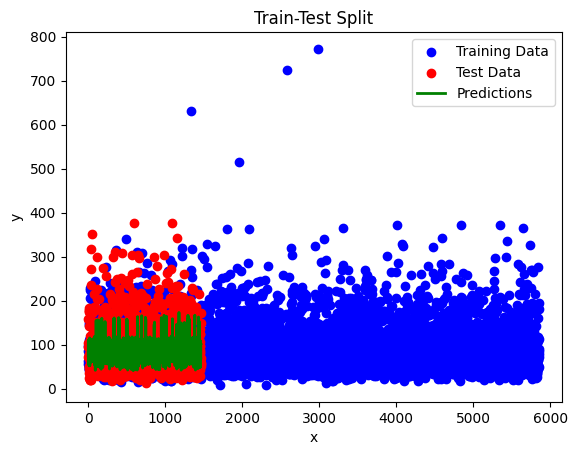

In [26]:
import matplotlib.pyplot as plt
# for error solution we had to convert the x_train and x_test to 1d array as they were 2D (found from stackoverflow)
x_train=np.arange(0,len(x_train),1)
x_test=np.arange(0,len(x_test),1)
#the above line has solved the problem
# Plot the train-test split
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='red', label='Test Data')
plt.plot(x_test, y_pred, color='green', linewidth=2, label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train-Test Split')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 49.57715208495716


In [31]:
# Using Z-score method to reduce RMSE
from scipy import stats

# Calculate Z-scores for each feature in X
z_scores = np.abs(stats.zscore(X))

# Set the threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Identify outliers by comparing the Z-scores with the threshold
outliers = np.where(z_scores > threshold)

# Remove the rows containing outliers
X_clean = X[(z_scores <= threshold).all(axis=1)]
Y_clean = Y[(z_scores <= threshold).all(axis=1)]

# Print the number of removed outliers
print("Number of removed outliers:", len(outliers[0]))

Number of removed outliers: 585


In [41]:
# Training the model again after optimization and changing test size

x_train, x_test, y_train, y_test = train_test_split(X_clean, Y_clean, test_size=0.22, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Print the predicted values
print("Predicted values:", y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE
print("Root Mean Square Error (RMSE):", rmse)

Predicted values: [ 71.6040076  109.61581538  70.49252481 ... 105.33761801  83.88249182
 109.41188933]
Root Mean Square Error (RMSE): 45.01491978488081


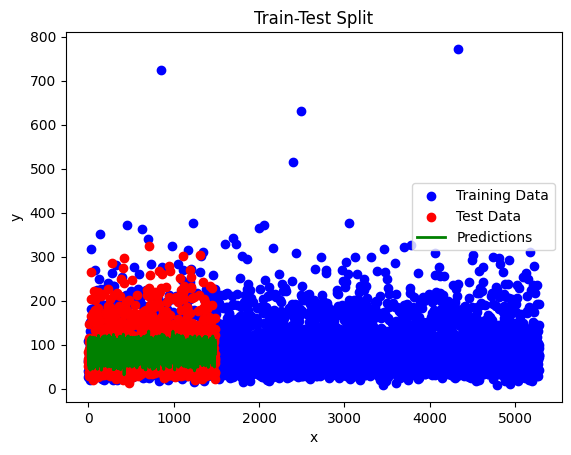

In [43]:
# new plot after z-score optimization

x_train=np.arange(0,len(x_train),1)
x_test=np.arange(0,len(x_test),1)
#the above line has solved the problem
# Plot the train-test split
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='red', label='Test Data')
plt.plot(x_test, y_pred, color='green', linewidth=2, label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train-Test Split')
plt.legend()
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler

# Apply data normalization using Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Split the normalized data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y_clean, test_size=0.22, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 45.01491978488081
